# Importing Necessary libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df1=pd.read_csv("applicant.csv")
df2=pd.read_csv("loan.csv")

Performing Exploratory Data Analysis

In [29]:
df1.head(6)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
5,1213971,35,male,single,2,for free,4,unskilled - resident,1 year,4 years,Registered under the applicant's name,1,NaN,NaN,NaN


In [30]:
df2.head(6)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
5,d68d9b1e-edad-11ea-8b43-2b6a0308d487,1213971,36,education,9055000,2,NaN,0,0,NaN,1,existing loans paid back duly till now,0


In [31]:
# so, we have numeric and categorical data.
# let's see if we have any duplicates and null values.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

In [33]:
df1.duplicated().sum()

0

In [34]:
df2.duplicated().sum()

0

In [35]:
#so, here we don't have any duplicate values. so, lets merge df1 and df2
df=pd.merge(df1, df2)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [37]:
df.shape

(1000, 27)

In [38]:
df.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

In [39]:
#removing columns that are not important for segmention of customers based on their risk
df.drop(columns=['loan_application_id'],inplace=True)
df.drop(columns=['applicant_id'],inplace=True)
df.drop(columns=['Telephone'],inplace=True)


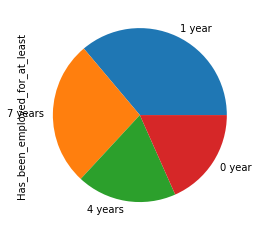

In [40]:
# so, there are null values both in numerical and categorical data.
# replacing numerical null values with mean and categorical null values with mode.
df['Has_been_employed_for_at_least'].value_counts().plot(kind='pie')

In [41]:
df['Has_been_employed_for_at_least'].fillna(df['Has_been_employed_for_at_least'].mode()[0],inplace=True)

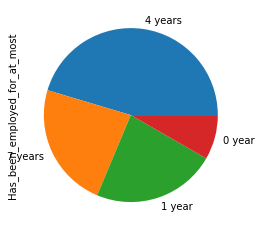

In [42]:
df['Has_been_employed_for_at_most'].value_counts().plot(kind='pie')

In [43]:
df['Has_been_employed_for_at_most'].fillna(df['Has_been_employed_for_at_most'].mode()[0],inplace=True)

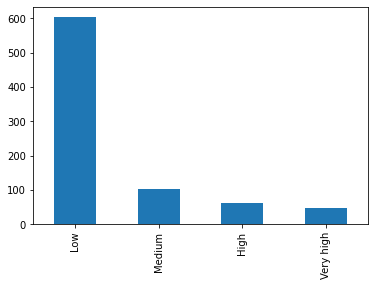

In [44]:
df['Savings_account_balance'].value_counts().plot(kind='bar')

In [45]:
df['Savings_account_balance'].fillna(df['Savings_account_balance'].mode()[0],inplace=True)

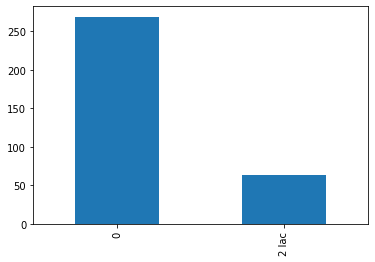

In [46]:
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].value_counts().plot(kind='bar')

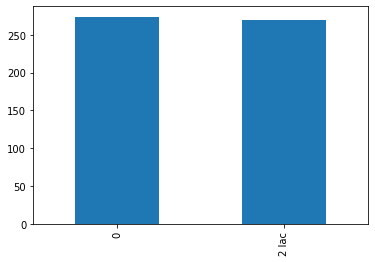

In [47]:
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].value_counts().plot(kind='bar')

In [48]:
# removing both upper limit of bucket and lower limited of bucket as both not providing enough information becoz of large amount of null values.
df.drop(columns=['Balance_in_existing_bank_account_(lower_limit_of_bucket)'],inplace=True)
df.drop(columns=['Balance_in_existing_bank_account_(upper_limit_of_bucket)'],inplace=True)

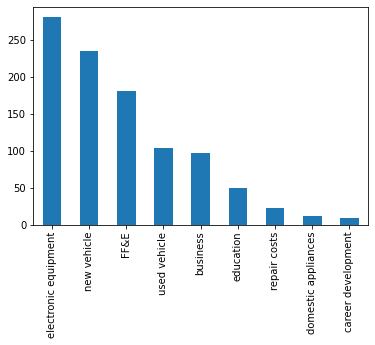

In [49]:
df['Purpose'].value_counts().plot(kind='bar')

In [50]:
df['Purpose'].fillna(df['Purpose'].mode()[0],inplace=True)

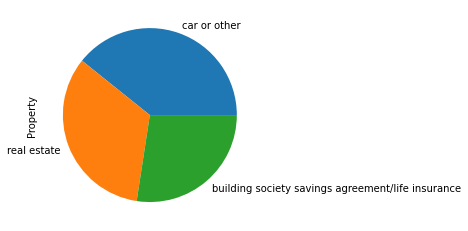

In [51]:
df['Property'].value_counts().plot(kind='pie')

In [52]:
df['Property'].fillna(df['Property'].mode()[0],inplace=True)

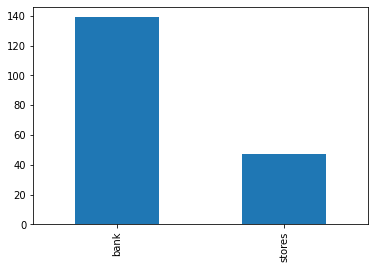

In [53]:
df['Other_EMI_plans'].value_counts().plot(kind='bar')

In [54]:
df['Other_EMI_plans'].fillna(df['Other_EMI_plans'].mode()[0],inplace=True)

In [56]:
df.isnull().sum()

Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Has_been_employed_for_at_least                 0
Has_been_employed_for_at_most                  0
Foreign_worker                                 0
Savings_account_balance                        0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Other_EMI_plans                                0
Number_of_existing_loans_at_this_bank          0
Loan_history        

In [57]:
# Now our dataset is clean
df.describe()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


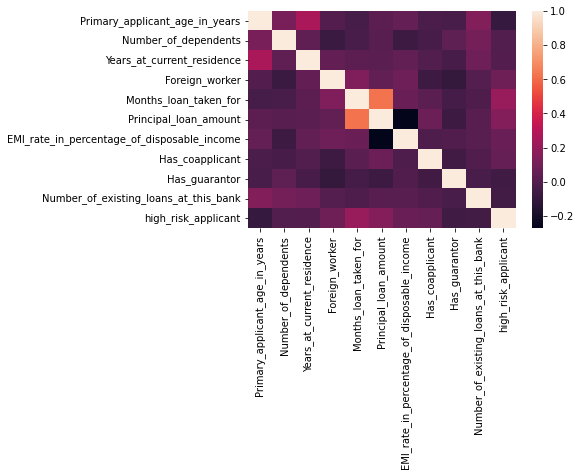

In [58]:
sns.heatmap(df.corr())

In [59]:
#"Months_loan_taken_for" and "Principal_loan_amount" have high corelation.
#let's see the corr of target varible.
df.corr()["high_risk_applicant"]

Primary_applicant_age_in_years                -0.091127
Number_of_dependents                          -0.003015
Years_at_current_residence                     0.002967
Foreign_worker                                 0.082079
Months_loan_taken_for                          0.214927
Principal_loan_amount                          0.154739
EMI_rate_in_percentage_of_disposable_income    0.072404
Has_coapplicant                                0.062728
Has_guarantor                                 -0.055039
Number_of_existing_loans_at_this_bank         -0.045732
high_risk_applicant                            1.000000
Name: high_risk_applicant, dtype: float64

In [60]:
#here 4 columns have negative corr with target varible,so we can remove those negative corr varibles/columns
df.drop(columns=['Primary_applicant_age_in_years'],inplace=True)
df.drop(columns=['Number_of_dependents'],inplace=True)
df.drop(columns=['Has_guarantor'],inplace=True)
df.drop(columns=['Number_of_existing_loans_at_this_bank'],inplace=True)


In [61]:
df.shape

(1000, 18)

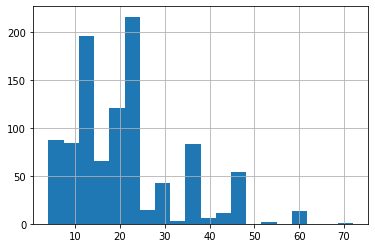

In [62]:
#there are 2 high corr varibles to the target varibles ,let's see if there are normalized or not.
df['Months_loan_taken_for'].hist(bins=20)
#here we saw incompleteness of the data.

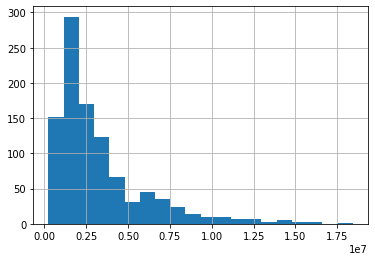

In [63]:
df['Principal_loan_amount'].hist(bins=20)
#here we saw skewness of the data.

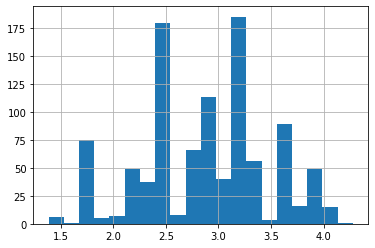

In [64]:
df['Months_loan_taken_for_log']=np.log(df['Months_loan_taken_for'])
df['Months_loan_taken_for_log'].hist(bins=20)

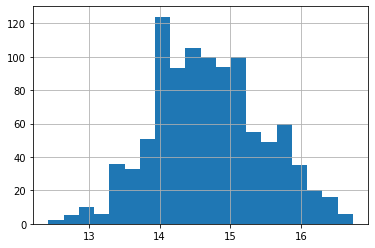

In [65]:
df['Principal_loan_amount_log']=np.log(df['Principal_loan_amount'])
df['Principal_loan_amount_log'].hist(bins=20)

In [ ]:
# we normalize the data.

In [66]:
df

,Gender,Marital_status,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Other_EMI_plans,Loan_history,high_risk_applicant,Months_loan_taken_for_log,Principal_loan_amount_log
0,male,single,own,4,skilled employee / official,7 years,4 years,1,Low,6,electronic equipment,1169000,4,real estate,0,bank,critical/pending loans at other banks,0,1.791759,13.971659
1,female,divorced/separated/married,own,2,skilled employee / official,1 year,4 years,1,Low,48,electronic equipment,5951000,2,real estate,0,bank,existing loans paid back duly till now,1,3.871201,15.599070
2,male,single,own,3,unskilled - resident,4 years,7 years,1,Low,12,education,2096000,2,real estate,0,bank,critical/pending loans at other banks,0,2.484907,14.555541
3,male,single,for free,4,skilled employee / official,4 years,7 years,1,Low,42,FF&E,7882000,2,building society savings agreement/life insurance,0,bank,existing loans paid back duly till now,0,3.737670,15.880092
4,male,single,for free,4,skilled employee / official,1 year,4 years,1,Low,24,new vehicle,4870000,3,car or other,0,bank,delay in paying off loans in the past,1,3.178054,15.398604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,divorced/separated/married,own,4,unskilled - resident,4 years,7 years,1,Low,12,FF&E,1736000,3,real estate,0,bank,existing loans paid back duly till now,0,2.484907,14.367094
996,male,divorced/separated,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,Low,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,bank,existing loans paid back duly till now,0,3.401197,15.165400
997,male,single,own,4,skilled employee / official,7 years,4 years,1,Low,12,electronic equipment,804000,4,car or other,0,bank,existing loans paid back duly till now,0,2.484907,13.597355
998,male,single,for free,4,skilled employee / official,1 year,4 years,1,Low,45,electronic equipment,1845000,4,car or other,0,bank,existing loans paid back duly till now,1,3.806662,14.427990


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Gender                                       1000 non-null   object 
 1   Marital_status                               1000 non-null   object 
 2   Housing                                      1000 non-null   object 
 3   Years_at_current_residence                   1000 non-null   int64  
 4   Employment_status                            1000 non-null   object 
 5   Has_been_employed_for_at_least               1000 non-null   object 
 6   Has_been_employed_for_at_most                1000 non-null   object 
 7   Foreign_worker                               1000 non-null   int64  
 8   Savings_account_balance                      1000 non-null   object 
 9   Months_loan_taken_for                        1000 non-null   int64  
 10  P

In [71]:
#Now converting the categorical data 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [72]:
#Now converting the categorical data 
cols = ['Gender', 'Marital_status', 'Housing', 'Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most',
        'Savings_account_balance','Purpose','Property','Other_EMI_plans','Loan_history']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)        

In [73]:
df.head()

,Gender,Marital_status,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Other_EMI_plans,Loan_history,high_risk_applicant,Months_loan_taken_for_log,Principal_loan_amount_log
0,1,3,1,4,1,3,2,1,1,6,5,1169000,4,2,0,0,1,0,1.791759,13.971659
1,0,1,1,2,1,1,2,1,1,48,5,5951000,2,2,0,0,3,1,3.871201,15.599070
2,1,3,1,3,3,2,3,1,1,12,4,2096000,2,2,0,0,1,0,2.484907,14.555541
3,1,3,0,4,1,2,3,1,1,42,0,7882000,2,0,0,0,3,0,3.737670,15.880092
4,1,3,0,4,1,1,2,1,1,24,6,4870000,3,1,0,0,2,1,3.178054,15.398604


In [74]:
# Now we can convert the data into x and y
#where x is features and y is target varible.
X = df.drop(columns=['high_risk_applicant'])
y = df['high_risk_applicant']

In [76]:
# to normalize all the feature varibles.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(X)
X

array([[ 0.67028006,  0.84568512, -0.13371046, ..., -1.14621191,
        -1.86486906, -0.933901  ],
       [-1.49191369, -1.11646133, -0.13371046, ...,  0.73436546,
         1.7083687 ,  1.16304581],
       [ 0.67028006,  0.84568512, -0.13371046, ..., -1.14621191,
        -0.67378981, -0.1815588 ],
       ...,
       [ 0.67028006,  0.84568512, -0.13371046, ...,  0.73436546,
        -0.67378981, -1.4161991 ],
       [ 0.67028006,  0.84568512, -2.01695631, ...,  0.73436546,
         1.59746802, -0.34591111],
       [ 0.67028006,  0.84568512, -0.13371046, ..., -1.14621191,
         1.59746802,  0.82450846]])

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import lazypredict

In [81]:
from lazypredict.Supervised import LazyClassifier

In [82]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 13.43it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.70               0.60     0.60      0.69   
XGBClassifier                      0.71               0.59     0.59      0.68   
NearestCentroid                    0.58               0.59     0.59      0.60   
RandomForestClassifier             0.70               0.58     0.58      0.68   
NuSVC                              0.72               0.58     0.58      0.68   
BernoulliNB                        0.67               0.58     0.58      0.66   
LGBMClassifier                     0.68               0.58     0.58      0.66   
ExtraTreesClassifier               0.69               0.57     0.57      0.67   
DecisionTreeClassifier             0.62               0.56     0.56      0.63   
KNeighborsClassifier               0.69               0.56     0.56      0.66   
QuadraticDiscriminantAnalysi

So the highest accuracy is by SVC i.e., : 0.72
 highest F1 score : ADAboost classifier:0.69



In [ ]:
### **TASK-1**

### 1. Do the Exploratory Data Analysis & share the insights.
#Done the EDA 

#2. How would you segment customers based on their risk (of default).
#by selecting the target and varibles, determing the remaining features how much corr to target 

#3. Which of these segments / sub-segments would you propose be approved?
#    - For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a person with more credit accounts be more creditworthy?
#all the segments are highly important for classifying the task but some like id and telephone number are not that important and the unimport columns are being removed in th dataset.


#4. Tell us what your observations were on the data itself (completeness, skews).
#there is skewness in the data and also completeness in the data and both normalised usind sklearn libraries.

In [ ]:
### **TASK-2**
#1. Explain your intuition behind the features used for modeling.
#all the features are being important to determine the target varible and unimportant and having high negative values are being removed.

#2. Are you creating new derived features? If yes explain the intuition behind them.
#No

#3. Are there missing values? If yes how you plan to handle it.
#yes, there are missing values and for numerical missing values I used mean and categorical missing value I used mode.

#4. How categorical features are handled for modeling.
#By using label encoder all the categorical features are converted into unique numerical value.

#5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.
#corr matrix is used by all features and how these are being corr with the target feature. 4 features are negatively corr means there is no relation between the target feature and them and 2 are highly corr because there is strong corr b/w them.

#6. Do you plan to drop the correlated feature? If yes then how.
# I plan to drop the negatively corr features becoz of their unimportance.

#7. Which ML algorithm you plan to use for modeling.
# I used lazypredict lib where we can use all the models and can find the best model with accuracy and other metrics.

#8. **Train two (at least) ML models** to predict the credit risk & provide the confusion matrix for each model.
#9. How you will select the hyperparameters for models trained in above step.
#normalizing and standarization is important for model building.

#10. Which metric(s) you will choose to select between the set of models.
#using f1 score for classification problem.

#11. Explain how you will export the trained models & deploy it for prediction in production.#
#by saving the model and can frontend app and depolying on heroku.